---
# Mounting of Google Drive
---
Linking the Google Drive to Google CoLab

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


1) Click on the folder icon on the left.<br>
2) Navigate to the course folder<br>
3) Click on the menu button (three dots)<br>
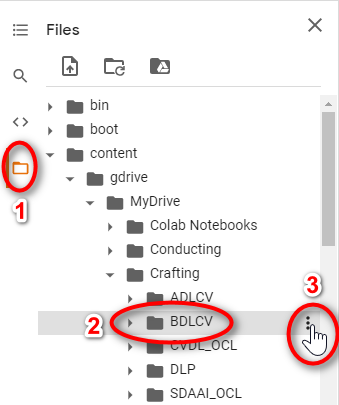
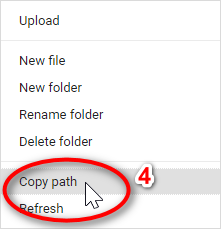
<br>
4. Click on "copy path".
5. Paste the copied path into the code below.

In [2]:
CourseFolder = "/content/gdrive/MyDrive/Crafting/BDLCV"

---
# Installation of the Libraries
----

The codes below installs the necessary libraries into the system.

In [3]:
# Installation of PIL / Pillow
!pip install pillow

# Installation of OpenCV
!pip install opencv-python

# Installation of imutils
!pip install imutils

# Installation of matplotlib
!pip install matplotlib

Test the installation by importing and printing the version numbers.

In [4]:
import PIL
print("PIL version: " + PIL.__version__)

import cv2
print("OpenCV version: " + cv2.__version__)

import imutils
print("Imutils version: " + imutils.__version__)

import matplotlib
print("amtplotlib version: " + matplotlib.__version__)

PIL version: 7.1.2
OpenCV version: 4.1.2
Imutils version: 0.5.4
amtplotlib version: 3.2.2


---
# Opening an image file
---
The codes below will open an image file (car-224.jpg) using different libraries.

In [5]:
# Using PIL
from PIL import Image
PIL_image = Image.open(CourseFolder + '/images/car-224.jpg')

# Using OpenCV
import cv2
OpenCV_image = cv2.imread(CourseFolder + '/images/car-224.jpg')

#Using matplotlib
import matplotlib.image as mpl_img
MPL_image = mpl_img.imread(CourseFolder + '/images/car-224.jpg')

Imutils enhance the file opening proces by providing a function to list all images files only in a folder.

In [6]:
from imutils import paths
for imagePath in paths.list_images(CourseFolder + "/images"):
	print(imagePath)

/content/gdrive/MyDrive/Crafting/BDLCV/images/bay.jpg
/content/gdrive/MyDrive/Crafting/BDLCV/images/snake-224.jpg
/content/gdrive/MyDrive/Crafting/BDLCV/images/football-299.jpg
/content/gdrive/MyDrive/Crafting/BDLCV/images/merlion-224.jpg
/content/gdrive/MyDrive/Crafting/BDLCV/images/eagle-299.jpg
/content/gdrive/MyDrive/Crafting/BDLCV/images/car-224.jpg
/content/gdrive/MyDrive/Crafting/BDLCV/images/merlion-299.jpg
/content/gdrive/MyDrive/Crafting/BDLCV/images/elephant-224.jpg
/content/gdrive/MyDrive/Crafting/BDLCV/images/car-224-matplotlib.jpg
/content/gdrive/MyDrive/Crafting/BDLCV/images/car-224-pil.jpg
/content/gdrive/MyDrive/Crafting/BDLCV/images/car-224-opencv.jpg


Print out the raw values of the images opened by PIL and OpenCV. Observe the difference in format (RGB vs BGR).

In [7]:
print("print PIL object:", PIL_image)
# Convert PIL image into array
import numpy as np
print("print PIL values: ", np.asarray(PIL_image))
print("print OpenCV object: ", OpenCV_image)
print("print Matplotlib object: ", MPL_image)

print("Pixel value of PIL:", PIL_image.getpixel((200,100)) )
print("Pixel value of OpenCV:", OpenCV_image[100][200] )
print("Pixel value of Matplotlib:", MPL_image[100][200] )

print PIL object: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F7384DA3A90>
print PIL values:  [[[249 249 249]
  [249 249 249]
  [249 249 249]
  ...
  [249 249 249]
  [249 249 249]
  [249 249 249]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[101 103  90]
  [101 103  90]
  [101 103  90]
  ...
  [ 70  67  50]
  [ 72  69  52]
  [ 73  70  53]]

 [[ 97 100  79]
  [ 98 101  80]
  [ 99 102  81]
  ...
  [ 76  73  56]
  [ 76  73  56]
  [ 77  74  57]]

 [[134 138 113]
  [136 140 115]
  [140 144 119]
  ...
  [132 129 112]
  [132 129 112]
  [132 129 112]]]
print OpenCV object:  [[[249 249 249]
  [249 249 249]
  [249 249 249]
  ...
  [249 249 249]
  [249 249 249]
  [249 249 249]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[254 254 254]
  [25

---
# Displaying an image
---
All libraries provides a function to display image.

### PIL
```
# PIL launch the system's default image viewer.
PIL_image.show()
```

### OpenCV
```
cv2.imshow('An image window', OpenCV_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```
Important note regarding imshow
* If the windows are not destroy, the shell will hang after the program is executed
* The function waitKey will wait for a key event allowing you to view the displayed images


All the function above are not compatible with Google Colab.<br>Only matplotlib is integrated into Google colab.

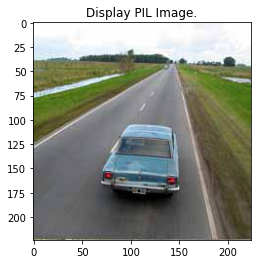

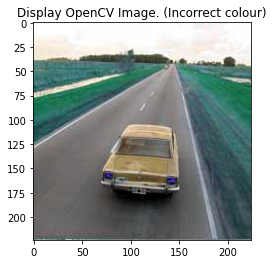

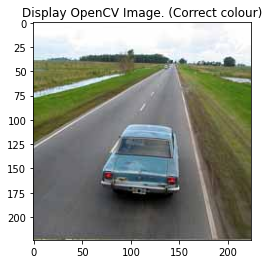

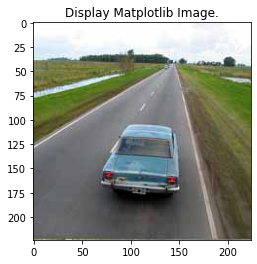

In [8]:
# Display PIL image using matplotlib
import matplotlib.pyplot as plt
plt.title("Display PIL Image.")
plt.imshow(np.asarray(PIL_image))
plt.show()

# Display OpenCV Image using matplotlib
plt.title("Display OpenCV Image. (Incorrect colour)")
plt.imshow(OpenCV_image)
plt.show()
# The code above display the image with the incorrect colour
# Imutils provides a function to easily convert the image before showing
plt.title("Display OpenCV Image. (Correct colour)")
plt.imshow(imutils.opencv2matplotlib(OpenCV_image))
plt.show()

# Display Matplotlib Image using matplotlib
plt.title("Display Matplotlib Image.")
plt.imshow(MPL_image)
plt.show()

---
# Obtaining Image properties/information
---
During image handling or processing, some information is required before the processing is performed.
* Width of image
* Height of image
* Type / Mode / Channel (e.g. Greyscale or colour)



In [9]:
# PIL
print("PIL format: ", PIL_image.format)
print("PIL (width, height): ", PIL_image.size)
print("PIL mode: ", PIL_image.mode)
print()

#OpenCV
print("OpenCV height: ", OpenCV_image.shape[0])
print("OpenCV width: ", OpenCV_image.shape[1])
print("OpenCV channel: ", OpenCV_image.shape[2])
print()

# Matplotlib
print("Matplotlib height: ", MPL_image.shape[0])
print("Matplotlib width: ", MPL_image.shape[1])
print("Matplotlib channel: ", MPL_image.shape[2])


PIL format:  JPEG
PIL (width, height):  (224, 224)
PIL mode:  RGB

OpenCV height:  224
OpenCV width:  224
OpenCV channel:  3

Matplotlib height:  224
Matplotlib width:  224
Matplotlib channel:  3


---
# Saving an image
---

In [10]:
# PIL
PIL_image.save(CourseFolder + "/images/car-224-pil.jpg")

# OpenCV
cv2.imwrite(CourseFolder + "/images/car-224-opencv.jpg", OpenCV_image)

# Matplotlib
plt.imsave(CourseFolder + "/images/car-224-matplotlib.jpg", MPL_image, format='jpg')
